In [1]:
from fastai.text import *
import html

In [2]:
BOS='xbos'
FLD = 'xfld'
PATH = Path('data/zindi_sdg/')

In [3]:
LM_PATH = PATH/'LM'
CLAS_PATH = PATH/'CLAS'

In [4]:
LM_PATH.mkdir(exist_ok=True)
CLAS_PATH.mkdir(exist_ok=True)

In [5]:
col_names = ['labels', 'text']

In [181]:
trn_df = pd.read_csv(PATH/'train/Devex_train.csv', encoding="ISO-8859-1")
val_df = pd.read_csv(PATH/'test/Devex_test_questions.csv', encoding="ISO-8859-1")

In [182]:
trn_df.columns

Index(['Unique ID', 'Type', 'Text', 'Label 1', 'Label 2', 'Label 3', 'Label 4',
       'Label 5', 'Label 6', 'Label 7', 'Label 8', 'Label 9', 'Label 10',
       'Label 11', 'Label 12'],
      dtype='object')

In [183]:
val_df.columns

Index(['Unique ID', 'Type', 'Text'], dtype='object')

In [184]:
classes = ['3.1.1', '3.1.2', '3.2.1', '3.2.2', '3.3.1',
           '3.3.2', '3.3.3', '3.3.4', '3.3.5', '3.4.1',
           '3.4.2', '3.5.1', '3.5.2', '3.6.1', '3.7.1',
           '3.7.2', '3.8.1', '3.8.2', '3.9.1', '3.9.2',
           '3.9.3', '3.a.1', '3.b.1', '3.b.2', '3.b.3',
           '3.c.1', '3.d.1']

labels = {k:v for k, v in enumerate(classes)}

In [185]:
labels
labels_rev = {v:k for k, v in labels.items()}

In [186]:
labels_rev

{'3.1.1': 0,
 '3.1.2': 1,
 '3.2.1': 2,
 '3.2.2': 3,
 '3.3.1': 4,
 '3.3.2': 5,
 '3.3.3': 6,
 '3.3.4': 7,
 '3.3.5': 8,
 '3.4.1': 9,
 '3.4.2': 10,
 '3.5.1': 11,
 '3.5.2': 12,
 '3.6.1': 13,
 '3.7.1': 14,
 '3.7.2': 15,
 '3.8.1': 16,
 '3.8.2': 17,
 '3.9.1': 18,
 '3.9.2': 19,
 '3.9.3': 20,
 '3.a.1': 21,
 '3.b.1': 22,
 '3.b.2': 23,
 '3.b.3': 24,
 '3.c.1': 25,
 '3.d.1': 26}

In [187]:
text_labels = [f'Label {n+1}' for n in range(12)]

In [188]:
text_labels

['Label 1',
 'Label 2',
 'Label 3',
 'Label 4',
 'Label 5',
 'Label 6',
 'Label 7',
 'Label 8',
 'Label 9',
 'Label 10',
 'Label 11',
 'Label 12']

In [219]:
trn_df['Labels'] = ' '

In [220]:
foo='3.d.1 fafa'
foo[:5]

'3.d.1'

In [ ]:
iloc_label_columns = collections.defaultdict(lambda: {})
for index, row in trn_df.iterrows():
    row_labels = []
    for c in text_labels:
        c_val = row[c]
        if isinstance(c_val, str):
            iloc_label_columns[index].update({c: c_val[:5]})
            row_labels.extend([int(x) for x in list(str(labels_rev[c_val[:5]]).split())])
    trn_df.loc[index, 'Labels'] = np.array([row_labels])
#             print(c_val)

In [ ]:
%debug

In [191]:
iloc_label_columns2 = collections.defaultdict(lambda: {})
for index, row in trn_df.iterrows():
    for c in text_labels:
        c_val = row[c]
        if isinstance(c_val, str):
            iloc_label_columns2[index].update({c: c_val[:5]})
            trn_df.loc[index, c_val[:5]] = 1
#             print(c_val)

In [197]:
clean_train_df = trn_df[['Text'] + classes]

In [198]:
clean_train_df = clean_train_df.fillna(0)

In [199]:
clean_train_df

,Text,3.1.1,3.1.2,3.2.1,3.2.2,3.3.1,3.3.2,3.3.3,3.3.4,3.3.5,...,3.8.2,3.9.1,3.9.2,3.9.3,3.a.1,3.b.1,3.b.2,3.b.3,3.c.1,3.d.1
0,Centers of Biomedical Research Excellence (COB...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,Research on Regenerative Medicine <h2><strong>...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Catholic Health Association of India (CHAI): <...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,Quality Improvement Initiatives for Diabetes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Provision of Thalassemia Drugs and Disposables...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Egypt Country Programme For Family Planning (2...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Improving Quantification and Forecasting of Ne...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7,Call for Metrology for Emerging Radiopharmaceu...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,Funding to Stimulate Clinical and Translationa...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,Procurement of Radiopharmaceuticals for Treatm...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
trn_df['Labels']

0              23 25 
1                 23 
2        26 16 17 24 
3                  9 
4                8 9 
5              14 15 
6            24 23 5 
7               23 9 
8                 23 
9               9 16 
10              5 23 
11             23 26 
12             19 16 
13                23 
14              9 23 
15              25 9 
16       16 17 22 24 
17                 9 
18             23 24 
19              9 16 
20           9 23 24 
21          14 15 16 
22             23 24 
23                 4 
24                 3 
25       4 26 16 9 3 
26                26 
27            3 1 25 
28               2 0 
29                23 
            ...      
2965               4 
2966              23 
2967           10 11 
2968            26 8 
2969            4 23 
2970             0 2 
2971        10 11 23 
2972              26 
2973               9 
2974           26 23 
2975              23 
2976            9 16 
2977              23 
2978            4 23 
2979      

In [84]:
json.dump(iloc_label_columns, (PATH/'iloc_label_columns.json').open('w'))

In [234]:
clean_train_df[classes]

,3.1.1,3.1.2,3.2.1,3.2.2,3.3.1,3.3.2,3.3.3,3.3.4,3.3.5,3.4.1,...,3.8.2,3.9.1,3.9.2,3.9.3,3.a.1,3.b.1,3.b.2,3.b.3,3.c.1,3.d.1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [226]:
df_trn_clas = pd.DataFrame({'text': trn_df['Text'], 'labels': trn_df['Labels']}, columns=col_names)
# df_val_clas = pd.DataFrame({'text': val_df['Text'], 'labels': trn_df['Labels']}, columns=col_names)

In [237]:
cv_idxs = get_cv_idxs(len(clean_train_df))

In [228]:
get_cv_idxs??

In [238]:
# np.random.seed(42)
cv_indexes = clean_train_df.index.isin(cv_idxs)
train_df = clean_train_df[~cv_indexes]
validation_df = clean_train_df[cv_indexes]

In [248]:
train_df = train_df[classes + ['Text']]

In [250]:
validation_df = validation_df[classes+['Text']]

In [249]:
train_df

,3.1.1,3.1.2,3.2.1,3.2.2,3.3.1,3.3.2,3.3.3,3.3.4,3.3.5,3.4.1,...,3.9.1,3.9.2,3.9.3,3.a.1,3.b.1,3.b.2,3.b.3,3.c.1,3.d.1,Text
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Research on Regenerative Medicine <h2><strong>...
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Catholic Health Association of India (CHAI): <...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Quality Improvement Initiatives for Diabetes
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Provision of Thalassemia Drugs and Disposables...
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Egypt Country Programme For Family Planning (2...
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,Improving Quantification and Forecasting of Ne...
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Funding to Stimulate Clinical and Translationa...
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Procurement of Radiopharmaceuticals for Treatm...
10,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Predicting the Combination of Tuberculosis (TB...
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,Time-Sensitive Research on Health Risk and Res...


In [251]:
train_df.to_csv(CLAS_PATH/'clean_train.csv', header=False, index=False)
validation_df.to_csv(CLAS_PATH/'clean_valid.csv', header=False, index=False)

In [252]:
# Language model dataset

In [11]:
trn_texts, val_texts = sklearn.model_selection.train_test_split(np.concatenate([trn_df.Text.values, val_df.Text.values]), test_size=0.1)

In [12]:
len(trn_texts), len(val_texts)

(3593, 400)

In [13]:
df_trn = pd.DataFrame({'text': trn_texts, 'labels': [0]*len(trn_texts)}, columns=col_names)
df_val = pd.DataFrame({'text': val_texts, 'labels': [0]*len(val_texts)}, columns=col_names)

In [14]:
df_trn.to_csv(LM_PATH/'train.csv', header=False, index=False)
df_val.to_csv(LM_PATH/'test.csv', header=False, index=False)

In [6]:
df_trn = pd.read_csv(LM_PATH/'train.csv', header=None, lineterminator='\n')
df_val = pd.read_csv(LM_PATH/'test.csv', header=None, lineterminator='\n')

In [7]:
df_trn

,0,1
0,0,Provision of Voluntary Medical Male Circumcisi...
1,0,Provision of Sanitary Materials; ; <p><strong>...
2,0,Building Evidence: Effective Palliative/End of...
3,0,Accelerating the Decline of Tuberculosis in Hi...
4,0,To Provide Evidence To Help Understand Why Vac...
5,0,Provision of Consultancy Services for the Impl...
6,0,Provision of Vaccines for Control and Preventi...
7,0,"Strengthening Capacity for Laboratory Systems,..."
8,0,Interaction of Human Immunodeficiency Virus (H...
9,0,Preclinical Development of Drug to Prevent Hyp...


In [8]:
# Tokenization

In [36]:
chunksize = 12000

In [32]:
re1 = re.compile(r'  +')

def fixup(x):
    x = x.replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>','u_n').replace(' @.@ ','.').replace(
        ' @-@ ','-').replace('\\', ' \\ ')
    x = re.sub('<[^<]+?>', '', x)
    return re1.sub(' ', html.unescape(x))

In [38]:
def get_texts(df, n_lbls=1):
    labels = df.iloc[:,range(n_lbls)].values.astype(np.int64)
    texts = f'\n{BOS} {FLD} 1 ' + df[n_lbls].astype(str)
    for i in range(n_lbls+1, len(df.columns)): texts += f' {FLD} {i-n_lbls} ' + df[i].astype(str)
    texts = list(texts.apply(fixup).values)

    tok = Tokenizer().proc_all_mp(partition_by_cores(texts))
    return tok, list(labels)

In [39]:
def get_all(df, n_lbls):
    tok, labels = [], []
    for i, r in enumerate(df):
        print(i)
        tok_, labels_ = get_texts(r, n_lbls)
        tok += tok_;
        labels += labels_
    return tok, labels

In [10]:
df_trn = pd.read_csv(LM_PATH/'train.csv', header=None, chunksize=chunksize, lineterminator='\n')
df_val = pd.read_csv(LM_PATH/'test.csv', header=None, chunksize=chunksize, lineterminator='\n')

In [ ]:
df_test = pd.read_csv(PATH/'test/Devex_test_questions.csv', encoding="ISO-8859-1")

In [11]:
tok_trn, trn_labels = get_all(df_trn, 1)
tok_val, val_labels = get_all(df_val, 1)

0
0


In [48]:
(LM_PATH/'tmp').mkdir(exist_ok=True)

In [49]:
np.save(LM_PATH/'tmp'/'tok_trn.npy', tok_trn)
np.save(LM_PATH/'tmp'/'tok_val.npy', tok_val)

In [40]:
tok_trn = np.load(LM_PATH/'tmp'/'tok_trn.npy')
tok_val = np.load(LM_PATH/'tmp'/'tok_val.npy')

In [41]:
freq = Counter(p for o in tok_trn for p in o)
freq.most_common(25)

[('the', 87149),
 (',', 85838),
 ('and', 75528),
 ('of', 68344),
 ('.', 57467),
 ('t_up', 53324),
 ('to', 50268),
 ('in', 33545),
 ('&', 33054),
 ('-', 28580),
 (')', 28015),
 ('for', 26203),
 ('(', 24619),
 ('a', 19898),
 ('or', 17467),
 ('/', 16908),
 (':', 16838),
 ('research', 13197),
 ('is', 13174),
 ('that', 12992),
 ('be', 12477),
 ('\n', 12426),
 ('are', 12050),
 ('with', 11701),
 ('health', 11154)]

In [42]:
max_vocab = 60000
min_freq = 2

In [62]:
itos = [o for o,c in freq.most_common(max_vocab) if c>min_freq]
itos.insert(0, '_pad_')
itos.insert(0, '_unk_')

In [63]:
stoi = collections.defaultdict(lambda:0, {v:k for k,v in enumerate(itos)})
len(itos)

17032

In [54]:
trn_lm = np.array([[stoi[o] for o in p] for p in tok_trn])
val_lm = np.array([[stoi[o] for o in p] for p in tok_val])

In [55]:
np.save(LM_PATH/'tmp'/'trn_ids.npy', trn_lm)
np.save(LM_PATH/'tmp'/'val_ids.npy', val_lm)
pickle.dump(itos, open(LM_PATH/'tmp'/'itos.pkl', 'wb'))

In [43]:
trn_lm = np.load(LM_PATH/'tmp'/'trn_ids.npy')
val_lm = np.load(LM_PATH/'tmp'/'val_ids.npy')
itos = pickle.load(open(LM_PATH/'tmp'/'itos.pkl', 'rb'))

In [45]:
vs=len(itos)
vs,len(trn_lm)

(17032, 3593)

In [46]:
em_sz,nh,nl = 400,1150,3

In [47]:
PRE_PATH = PATH/'models'/'wt103'
PRE_LM_PATH = PRE_PATH/'fwd_wt103.h5'

In [48]:
wgts = torch.load(PRE_LM_PATH, map_location=lambda storage, loc: storage)

In [49]:
enc_wgts = to_np(wgts['0.encoder.weight'])
row_m = enc_wgts.mean(0)

In [50]:
itos2 = pickle.load((PRE_PATH/'itos_wt103.pkl').open('rb'))
stoi2 = collections.defaultdict(lambda:-1, {v:k for k,v in enumerate(itos2)})

In [51]:
new_w = np.zeros((vs, em_sz), dtype=np.float32)
for i,w in enumerate(itos):
    r = stoi2[w]
    new_w[i] = enc_wgts[r] if r>=0 else row_m

In [52]:
wgts['0.encoder.weight'] = T(new_w)
wgts['0.encoder_with_dropout.embed.weight'] = T(np.copy(new_w))
wgts['1.decoder.weight'] = T(np.copy(new_w))

In [53]:
new_w.shape

(17032, 400)

In [54]:
wd=1e-7
bptt=70
bs=52
opt_fn = partial(optim.Adam, betas=(0.8, 0.99))

In [55]:
trn_dl = LanguageModelLoader(np.concatenate(trn_lm), bs, bptt)
val_dl = LanguageModelLoader(np.concatenate(val_lm), bs, bptt)
md = LanguageModelData(PATH, 1, vs, trn_dl, val_dl, bs=bs, bptt=bptt)

In [56]:
# set dropout factor to 0.8 since dataset is small
drops = np.array([0.25, 0.1, 0.2, 0.02, 0.15])*0.7

In [57]:
learner= md.get_model(opt_fn, em_sz, nh, nl, 
    dropouti=drops[0], dropout=drops[1], wdrop=drops[2], dropoute=drops[3], dropouth=drops[4])

learner.metrics = [accuracy]
learner.freeze_to(-1)

In [58]:
learner.model.load_state_dict(wgts)

In [59]:
lr=1e-3
lrs = lr

In [60]:
learner.fit(lrs/2, 1, wds=wd, use_clr=(32,2), cycle_len=2)

  0%|          | 0/590 [00:00<?, ?it/s]


RuntimeError: Expected object of type Variable[torch.cuda.LongTensor] but found type Variable[torch.cuda.FloatTensor] for argument #1 'target'

In [61]:
%debug

> /home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/functional.py(1052)nll_loss()
   1050         weight = Variable(weight)
   1051     if dim == 2:
-> 1052         return torch._C._nn.nll_loss(input, target, weight, size_average, ignore_index, reduce)
   1053     elif dim == 4:
   1054         return torch._C._nn.nll_loss2d(input, target, weight, size_average, ignore_index, reduce)

ipdb> input
Variable containing:
-1.6444e+01 -1.6007e+01 -1.6352e+01  ...  -1.5741e+01 -1.5741e+01 -1.5741e+01
-1.0047e+01 -1.0707e+01 -7.8921e+00  ...  -1.0605e+01 -1.0605e+01 -1.0605e+01
-1.0015e+01 -1.1040e+01 -1.6113e+00  ...  -1.1096e+01 -1.1096e+01 -1.1096e+01
                ...                   ⋱                   ...                
-1.1350e+01 -1.2928e+01 -1.1483e+01  ...  -1.2747e+01 -1.2747e+01 -1.2747e+01
-1.0160e+01 -1.1789e+01 -4.7690e+00  ...  -1.1791e+01 -1.1791e+01 -1.1791e+01
-1.0140e+01 -1.1493e+01 -9.5165e+00  ...  -1.1481e+01 -1.1481e+01 -1.1481e+01
[torch.cuda.Flo

In [24]:
learner.save('lm_last_ft')

In [ ]:
learner.load('lm_last_ft')

In [25]:
learner.unfreeze()

In [26]:
learner.lr_find(start_lr=lrs/10, end_lr=lrs*10, linear=True)

epoch      trn_loss   val_loss   accuracy                   
    0      3.805116   3.734998   0.347526  



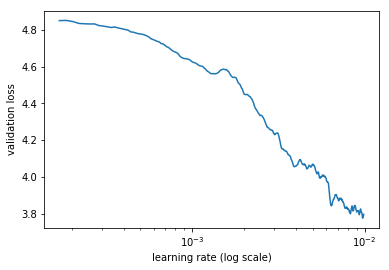

In [27]:
learner.sched.plot()

In [28]:
learner.fit(lrs, 1, wds=wd, use_clr=(20,10), cycle_len=15)

epoch      trn_loss   val_loss   accuracy                   
    0      3.993001   3.702529   0.3514    
    1      3.483554   3.364537   0.392037                   
    2      3.246771   3.185227   0.416029                   
    3      3.06033    3.098367   0.42809                    
    4      2.91294    3.030294   0.439082                   
    5      2.832802   2.989592   0.446201                   
    6      2.727743   2.954613   0.4515                     
    7      2.656153   2.933759   0.456452                   
    8      2.582847   2.919326   0.45963                    
    9      2.537074   2.900044   0.464208                   
    10     2.499662   2.890516   0.465964                   
    11     2.482325   2.881578   0.468424                   
    12     2.465      2.871212   0.470195                   
    13     2.367514   2.876859   0.471044                   
    14     2.380225   2.878322   0.471097                   



[array([2.87832]), 0.4710972937670621]

In [29]:
learner.save('lm1')

In [30]:
learner.save_encoder('lm1_enc')

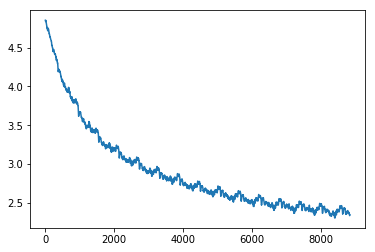

In [31]:
learner.sched.plot_loss()

# Classification tokens

In [33]:
chunksize=12000
df_trn = pd.read_csv(CLAS_PATH/'clean_train.csv', header=None, chunksize=chunksize, lineterminator='\n')
df_val = pd.read_csv(CLAS_PATH/'clean_valid.csv', header=None, chunksize=chunksize, lineterminator='\n')

In [34]:
def get_texts(df, n_lbls=1):
    labels = df.iloc[:,range(n_lbls)].values.astype(np.float64)
    texts = f'\n{BOS} {FLD} 1 ' + df[n_lbls].astype(str)
    for i in range(n_lbls+1, len(df.columns)): texts += f' {FLD} {i-n_lbls} ' + df[i].astype(str)
    texts = list(texts.apply(fixup).values)

    tok = Tokenizer().proc_all_mp(partition_by_cores(texts))
    return tok, list(labels)

In [35]:
def get_all(df, n_lbls):
    tok, labels = [], []
    for i, r in enumerate(df):
        print(i)
        tok_, labels_ = get_texts(r, n_lbls)
        tok += tok_;
        labels += labels_
    return tok, labels

In [36]:
tok_trn, trn_labels = get_all(df_trn, 27)
tok_val, val_labels = get_all(df_val, 27)

0
0


In [37]:
trn_labels

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
        0., 1.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.

In [263]:
(CLAS_PATH/'tmp').mkdir(exist_ok=True)

np.save(CLAS_PATH/'tmp'/'tok_trn.npy', tok_trn)
np.save(CLAS_PATH/'tmp'/'tok_val.npy', tok_val)

np.save(CLAS_PATH/'tmp'/'trn_labels.npy', trn_labels)
np.save(CLAS_PATH/'tmp'/'val_labels.npy', val_labels)

In [6]:
tok_trn = np.load(CLAS_PATH/'tmp'/'tok_trn.npy')
tok_val = np.load(CLAS_PATH/'tmp'/'tok_val.npy')

In [7]:
itos = pickle.load((LM_PATH/'tmp'/'itos.pkl').open('rb'))
stoi = collections.defaultdict(lambda:0, {v:k for k,v in enumerate(itos)})
len(itos)

17032

In [20]:
trn_clas = np.array([[stoi[o] for o in p] for p in tok_trn])
val_clas = np.array([[stoi[o] for o in p] for p in tok_val])

In [267]:
np.save(CLAS_PATH/'tmp'/'trn_ids.npy', trn_clas)
np.save(CLAS_PATH/'tmp'/'val_ids.npy', val_clas)

In [8]:
trn_clas = np.load(CLAS_PATH/'tmp'/'trn_ids.npy')
val_clas = np.load(CLAS_PATH/'tmp'/'val_ids.npy')

In [9]:
trn_labels = np.squeeze(np.load(CLAS_PATH/'tmp'/'trn_labels.npy'))
val_labels = np.squeeze(np.load(CLAS_PATH/'tmp'/'val_labels.npy'))

In [10]:
bptt,em_sz,nh,nl = 70,400,1150,3
vs = len(itos)
opt_fn = partial(optim.Adam, betas=(0.8, 0.99))
bs = 48

In [11]:
min_lbl = trn_labels.min()
trn_labels -= min_lbl
val_labels -= min_lbl
c=int(trn_labels.max())+1

In [12]:
c = 27

In [13]:
trn_ds = TextDataset(trn_clas, trn_labels)
val_ds = TextDataset(val_clas, val_labels)
trn_samp = SortishSampler(trn_clas, key=lambda x: len(trn_clas[x]), bs=bs//2)
val_samp = SortSampler(val_clas, key=lambda x: len(val_clas[x]))
trn_dl = DataLoader(trn_ds, bs//2, transpose=True, num_workers=1, pad_idx=1, sampler=trn_samp)
val_dl = DataLoader(val_ds, bs, transpose=True, num_workers=1, pad_idx=1, sampler=val_samp)
md = ModelData(PATH, trn_dl, val_dl)

In [14]:
dps = np.array([0.4,0.5,0.05,0.3,0.4])*0.8

In [15]:
class MultiLabelClassifier(nn.Module):
    
    def __init__(self, y_range=None):
        super().__init__()
        self.y_range = y_range
    
    def forward(self, input):
        x, raw_outputs, outputs = input
        x = F.sigmoid(x)
        if (self.y_range):
            x = x * (self.y_range[1] - self.y_range[0])
            x = x + self.y_range[0]
        
        return x, raw_outputs, outputs

def get_rnn_classifier(bptt, max_seq, n_class, n_tok, emb_sz, n_hid, n_layers, pad_token, layers, drops, bidir=False,
                      dropouth=0.3, dropouti=0.5, dropoute=0.1, wdrop=0.5, qrnn=False):
    rnn_enc = MultiBatchRNN(bptt, max_seq, n_tok, emb_sz, n_hid, n_layers, pad_token=pad_token, bidir=bidir,
                      dropouth=dropouth, dropouti=dropouti, dropoute=dropoute, wdrop=wdrop, qrnn=qrnn)
    return SequentialRNN(rnn_enc, PoolingLinearClassifier(layers, drops))

In [16]:
m = get_rnn_classifier(bptt, 20*70, c, vs, emb_sz=em_sz, n_hid=nh, n_layers=nl, pad_token=1,
          layers=[em_sz*3, 50, c], drops=[dps[4], 0.1],
          dropouti=dps[0], wdrop=dps[1], dropoute=dps[2], dropouth=dps[3])

In [17]:
opt_fn = partial(optim.Adam, betas=(0.7, 0.99))

In [18]:
from sklearn.metrics.classification import _check_targets, check_consistent_length, unique_labels, count_nonzero, _weighted_sum

In [19]:
def hamming_loss(y_pred, y_true, labels=None, sample_weight=None, thresh=0.5):
    y_pred = (y_pred>thresh).long()
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
    check_consistent_length(y_true, y_pred, sample_weight)

    if labels is None:
        labels = unique_labels(y_true, y_pred)
    else:
        labels = np.asarray(labels)

    if sample_weight is None:
        weight_average = 1.
    else:
        weight_average = np.mean(sample_weight)

    if y_type.startswith('multilabel'):
        n_differences = count_nonzero(y_true - y_pred,
                                      sample_weight=sample_weight)
        return (n_differences /
                (y_true.shape[0] * len(labels) * weight_average))

    elif y_type in ["binary", "multiclass"]:
        return _weighted_sum(y_true != y_pred, sample_weight, normalize=True)
    else:
        raise ValueError("{0} is not supported".format(y_type))


In [20]:
learn = RNN_Learner(md, TextModel(to_gpu(m)), opt_fn=opt_fn)
learn.reg_fn = partial(seq2seq_reg, alpha=2, beta=1)
learn.clip=25.
learn.metrics = [accuracy_multi, hamming_loss]

In [21]:
learn.crit = F.binary_cross_entropy_with_logits

In [22]:
lr=3e-3
lrm = 2.6
lrs = np.array([lr/(lrm**4), lr/(lrm**3), lr/(lrm**2), lr/lrm, lr])

In [23]:
lrs=np.array([1e-4,1e-4,1e-4,1e-3,1e-2])

In [24]:
wd = 1e-5
wd = 0
learn.load_encoder('lm1_enc')

In [26]:
learn.freeze_to(-1)

 86%|████████▌ | 86/100 [00:44<00:07,  1.93it/s, loss=1.73] 

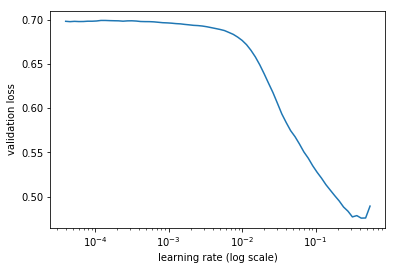

In [24]:
learn.lr_find(lrs/1000)
learn.sched.plot()

In [26]:
lrs

array([0.0001, 0.0001, 0.0001, 0.001 , 0.01  ])

In [27]:
learn.fit(lrs, 1, wds=wd, cycle_len=15, use_clr=(8,3))

epoch      trn_loss   val_loss   accuracy_multi hamming_loss 
    0      0.409329   0.256476   0.928708   0.071292  
    1      0.241498   0.254066   0.920176   0.079824         
    2      0.211962   0.193925   0.934582   0.065418         
    3      0.204551   0.198403   0.932542   0.067458         
    4      0.195838   0.178166   0.934459   0.065541         
    5      0.196836   0.173433   0.935881   0.064119         
    6      0.185204   0.167864   0.936561   0.063439        
    7      0.191902   0.170204   0.938416   0.061584         
    8      0.189642   0.165683   0.938416   0.061584        
    9      0.191149   0.173468   0.937674   0.062326         
    10     0.192145   0.166209   0.938416   0.061584         
    11     0.182106   0.167633   0.9399     0.0601          
    12     0.175534   0.158855   0.941136   0.058864         
    13     0.171916   0.161127   0.940147   0.059853         
    14     0.181748   0.166498   0.938478   0.061522        



[array([0.1665]), 0.9384777142925931, 0.061522290236814436]

In [28]:
learn.save('zindi_sdg_lm1_classifier')

In [28]:
learn.load('zindi_sdg_lm1_classifier')

In [29]:
learn.fit(lrs/10, 1, wds=wd, cycle_len=25, use_clr=(20,10))

epoch      trn_loss   val_loss   accuracy_multi hamming_loss 
    0      0.170248   0.162759   0.940085   0.059915  
    1      0.173128   0.156817   0.942064   0.057936         
    2      0.177828   0.158243   0.942188   0.057812         
    3      0.170016   0.157525   0.942435   0.057565        
    4      0.17408    0.157708   0.942373   0.057627        
    5      0.173619   0.159068   0.941878   0.058122        
    6      0.178668   0.159299   0.942188   0.057812        
    7      0.166797   0.157523   0.942559   0.057441         
    8      0.169131   0.15815    0.942311   0.057689         
    9      0.160895   0.155336   0.942991   0.057009         
    10     0.170232   0.157215   0.942559   0.057441        
    11     0.173184   0.156467   0.942373   0.057627         
    12     0.171832   0.157469   0.942744   0.057256        
    13     0.167254   0.159053   0.942126   0.057874        
    14     0.172152   0.161799   0.941817   0.058183         
    15     0.1659     

[array([0.16353]), 0.9415692801467564, 0.05843071786310518]

In [30]:
learn.save('zindi_sdg_lm1_classifier3')

 83%|████████▎ | 83/100 [00:48<00:10,  1.69it/s, loss=0.462]

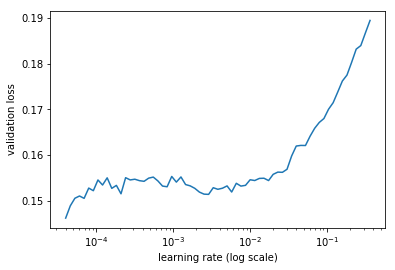

In [31]:
learn.lr_find(lrs/1000)
learn.sched.plot()

In [32]:
lrs

array([0.0001, 0.0001, 0.0001, 0.001 , 0.01  ])

In [33]:
learn.fit(lrs/10, 1, wds=wd, cycle_len=25, use_clr=(32,20))

epoch      trn_loss   val_loss   accuracy_multi hamming_loss 
    0      0.167316   0.157637   0.942249   0.057751  
    1      0.171434   0.163639   0.941569   0.058431         
    2      0.160797   0.157922   0.943177   0.056823        
    3      0.174004   0.159966   0.94194    0.05806          
    4      0.172502   0.155796   0.943053   0.056947        
    5      0.171605   0.15804    0.942682   0.057318         
    6      0.171108   0.156019   0.943053   0.056947         
    7      0.169288   0.156425   0.942744   0.057256        
    8      0.171829   0.159081   0.942126   0.057874         
    9      0.171475   0.156209   0.942682   0.057318         
    10     0.170374   0.155584   0.942311   0.057689        
    11     0.158942   0.155027   0.942188   0.057812         
    12     0.173426   0.155864   0.943362   0.056638         
    13     0.170799   0.157174   0.942682   0.057318        
    14     0.16852    0.161242   0.942682   0.057318         
    15     0.167323 

[array([0.15912]), 0.9426204193016523, 0.05737958325604403]

In [35]:
learn.save('zindi_sdg_lm1_classifier4')

In [25]:
learn.load('zindi_sdg_lm1_classifier4')

In [26]:
learn.freeze_to(-2)

In [27]:
learn.fit(lrs/10, 1, wds=wd, cycle_len=25, use_clr=(32,20))

epoch      trn_loss   val_loss   accuracy_multi hamming_loss 
    0      0.172103   0.162272   0.942559   0.057441  
 17%|█▋        | 17/100 [00:35<02:54,  2.10s/it, loss=0.167]

RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch_1518244421288/work/torch/lib/THC/generic/THCStorage.cu:58